<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise de Dados Bancários
Caderno de **Projeto**<br>
Aluno [Guilherme Araújo Vasconcelos](https://www.linkedin.com/in/guilherme-a-vasconcelos/)

## 1\. Contexto

Essa base de dados é uma simulação de um cadastro bancário para concessão de empréstimos de acordo com o histórico do cliente.

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# dataset disponível no Kaggle

https://www.kaggle.com/datasets/qusaybtoush1990/machine-learning/data

In [ ]:
# índice do dataset

#id: Id do empréstimo.

#grade: score.

#annual_inc: renda anual.

#short_emp: 1 quando estiver no emprego a 1 ano ou menos.

#emp_length_num: Tempo de emprego. valores possíveis vão de 0 a 10 representando os anos.

#home_ownership: tipo de propiedade da casa.

#dti (Debt-To-Income Ratio): Razão dos pagamentos mensais da dívida sobre o total da dívida, menos a hipoteca e o empréstimo, dividido pela renda mensal.

#purpose: Motivo do empréstimo.

#term: Número dos pagamentos do empréstimo em meses, de 36 a 60 meses.

#last_delinq_none: 1 quando o tomador teve algum problema de pagamento.

#last_major_derog_none: 1 quando o tomador teve pelo menos 90 dias com score baixo.

#revol_util: Quantidade de crédito utilizado em razão do crédito todal disponível.

#total_rec_late_fee: pagamentos atrasados recebidos.

#od_ratio: cheque especial.

#bad_loan: 1 quando o empréstimo não foi pago.

In [ ]:
loan = pd.read_csv('./lending_club_loan_dataset.csv', sep=',')

In [ ]:
loan.isnull()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
# a coluna last_major_derog_none está como nula, então vamos remover

loan = loan.dropna()

In [ ]:
# a coluna ID não é relevante para o estudo

loan = loan.drop(['id'], axis=1)

In [ ]:
# vamos tranformar a coluna term em numérico

loan['term'] = loan['term'].str.replace('months', '')
loan['term'] = loan['term'].astype(float)

In [ ]:
loan.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
44,C,75000.0,0,11,MORTGAGE,7.46,debt_consolidation,36.0,0,0.0,12.4,0.0,0.472723,1
76,B,41600.0,0,3,MORTGAGE,17.22,credit_card,36.0,1,1.0,73.9,0.0,0.755054,0
143,C,98280.0,0,11,RENT,26.43,debt_consolidation,60.0,1,1.0,37.7,0.0,0.918451,0
226,A,223000.0,0,5,MORTGAGE,1.35,debt_consolidation,36.0,1,1.0,21.1,0.0,0.511911,0
237,C,55000.0,0,7,RENT,22.43,debt_consolidation,36.0,0,0.0,67.7,0.0,0.036955,1


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 44 to 19892
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  524 non-null    object 
 1   annual_inc             524 non-null    float64
 2   short_emp              524 non-null    int64  
 3   emp_length_num         524 non-null    int64  
 4   home_ownership         524 non-null    object 
 5   dti                    524 non-null    float64
 6   purpose                524 non-null    object 
 7   term                   524 non-null    float64
 8   last_delinq_none       524 non-null    int64  
 9   last_major_derog_none  524 non-null    float64
 10  revol_util             524 non-null    float64
 11  total_rec_late_fee     524 non-null    float64
 12  od_ratio               524 non-null    float64
 13  bad_loan               524 non-null    int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 61.4+ KB


<Axes: xlabel='bad_loan', ylabel='count'>

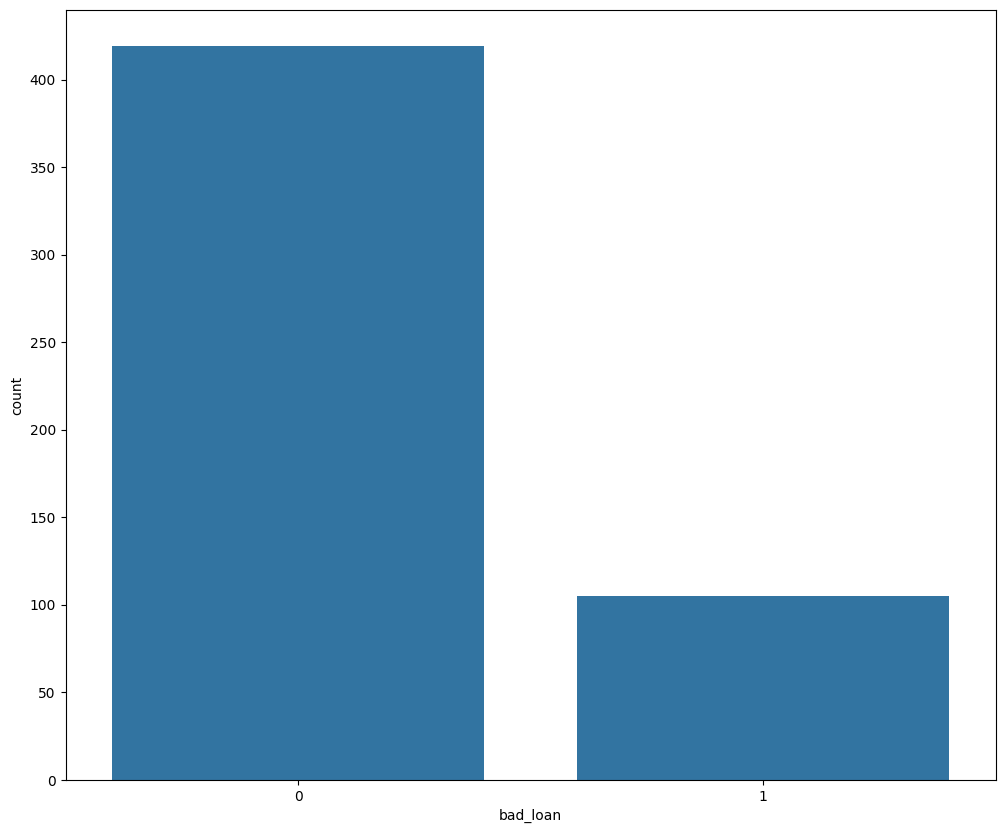

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'bad_loan', data = loan)

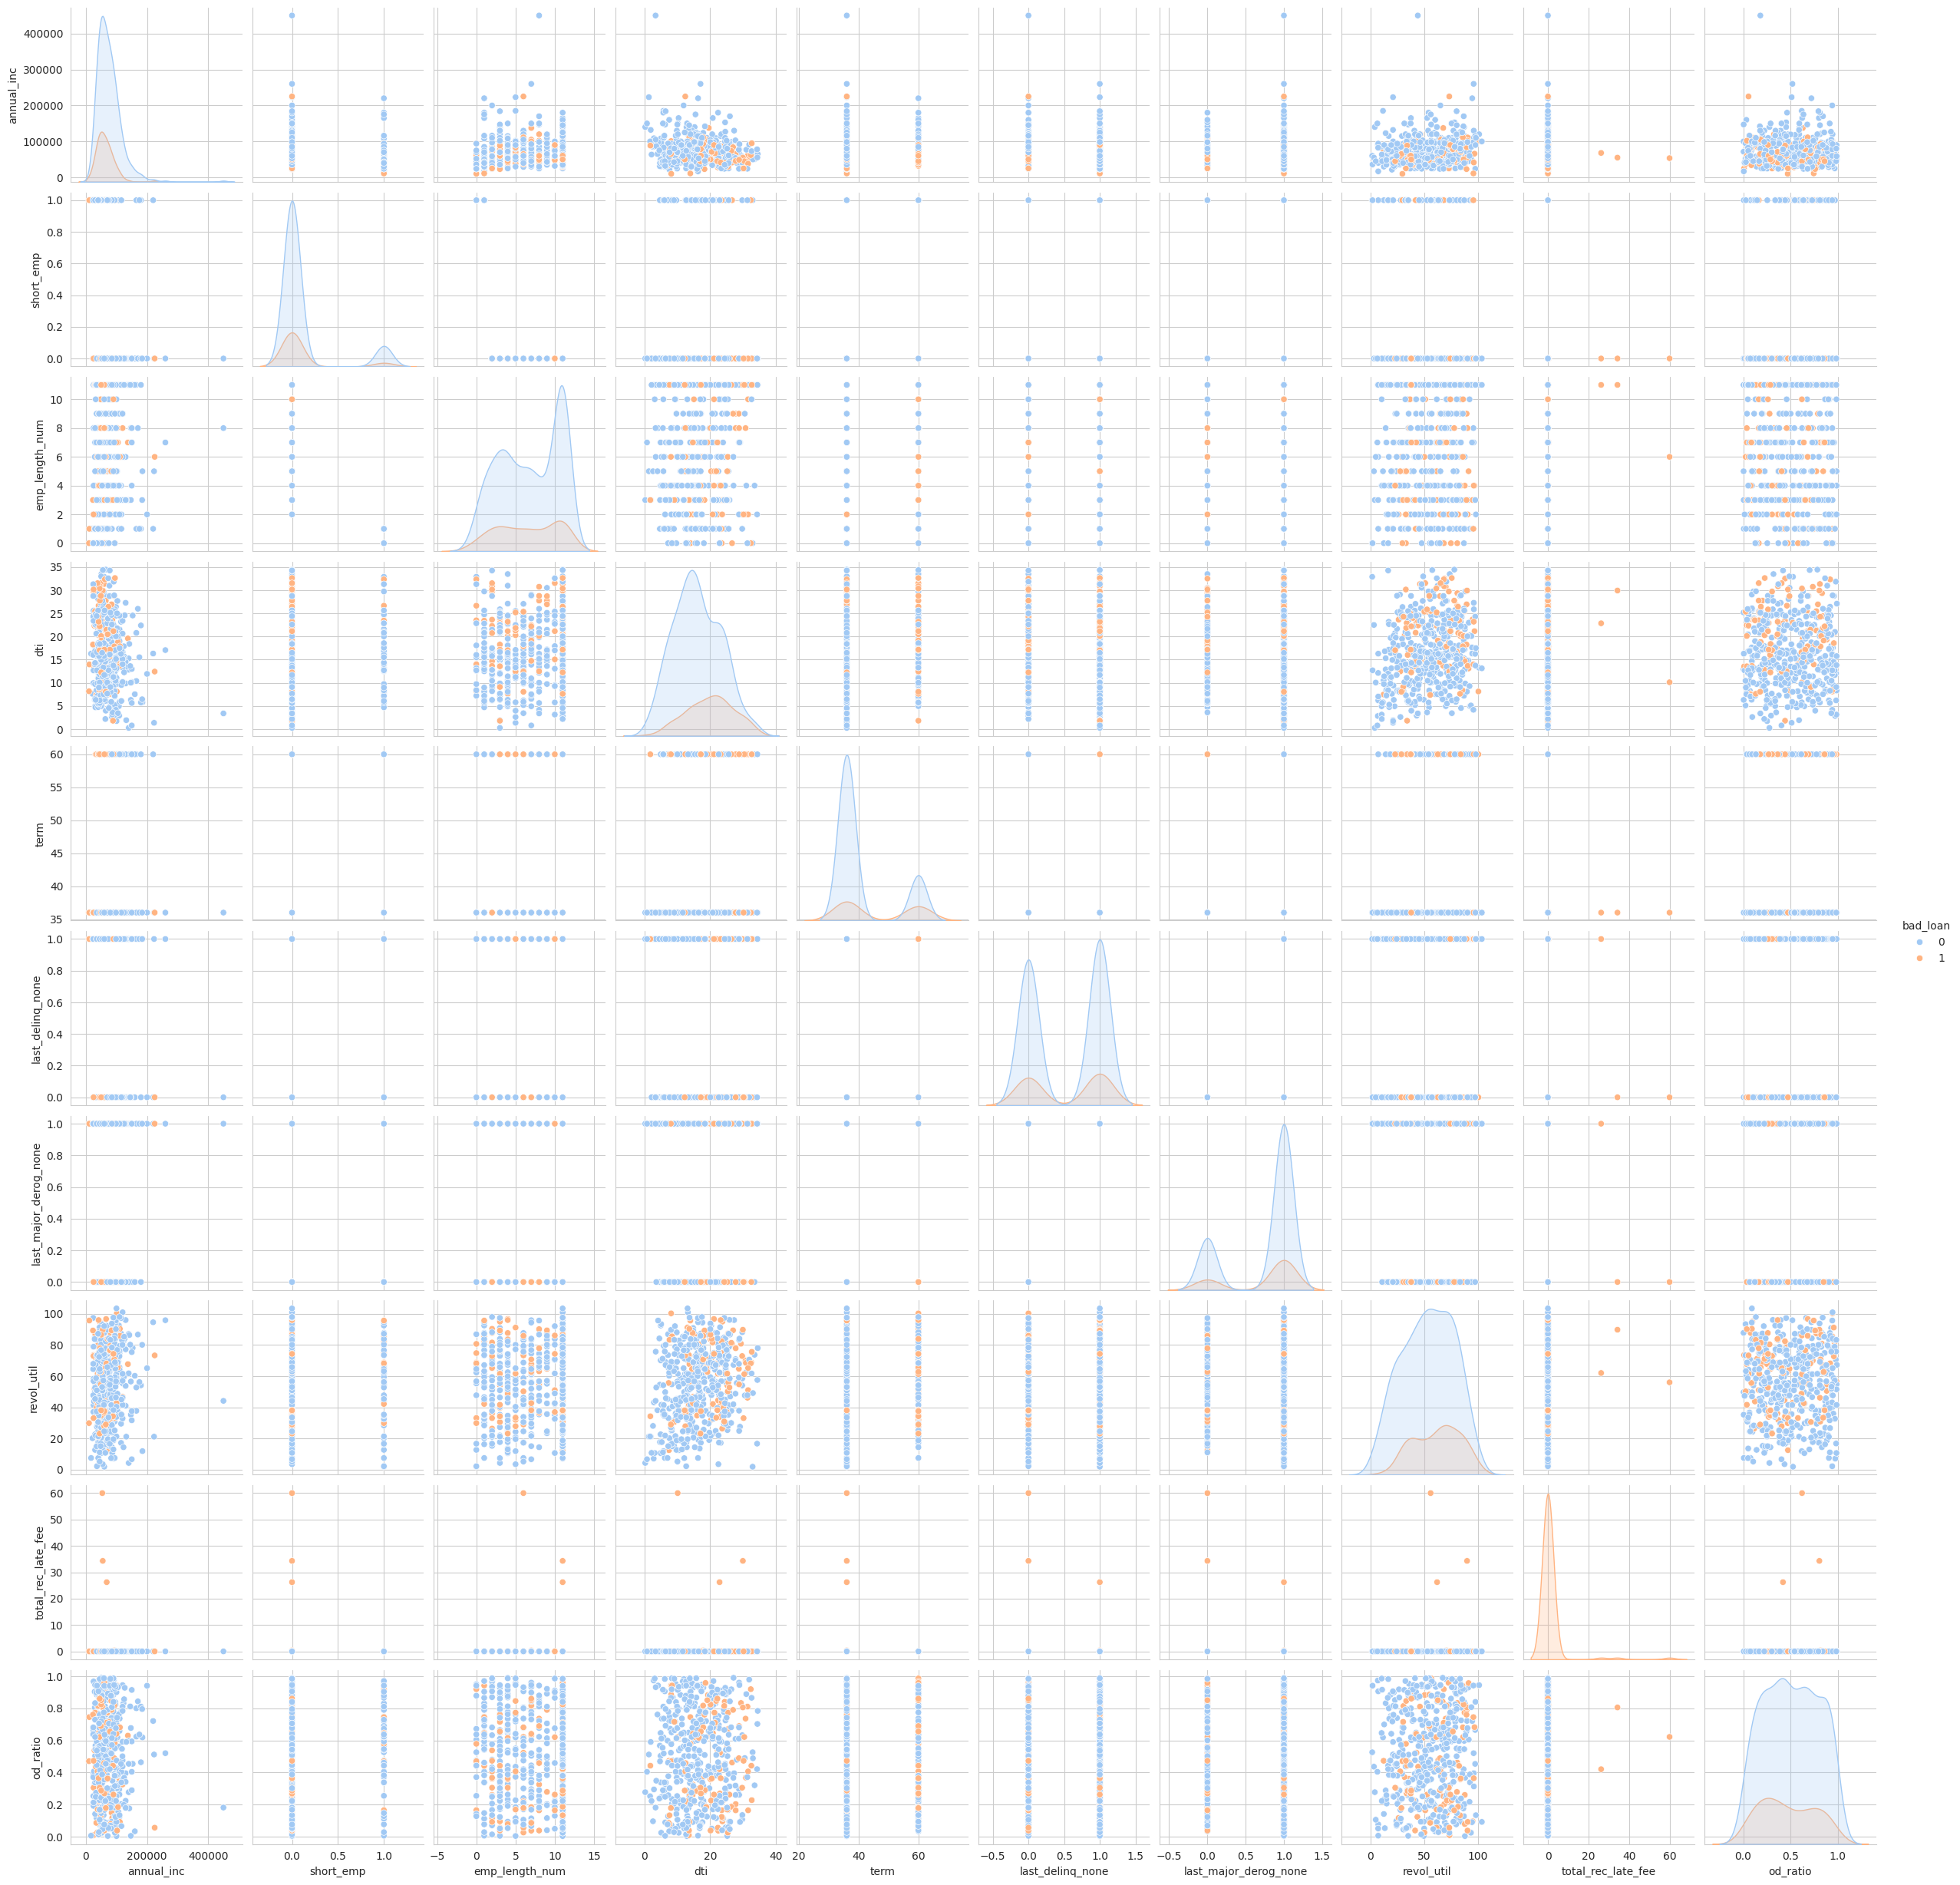

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=loan, hue="bad_loan", palette="pastel")

In [ ]:
# após uma análise rápida do gráfico é possível ver que o recebimento de pagamentos atrasados - total_rec_late_fee - tem certa correlação com o inadimplemento. Vamos analisar algumas colunas

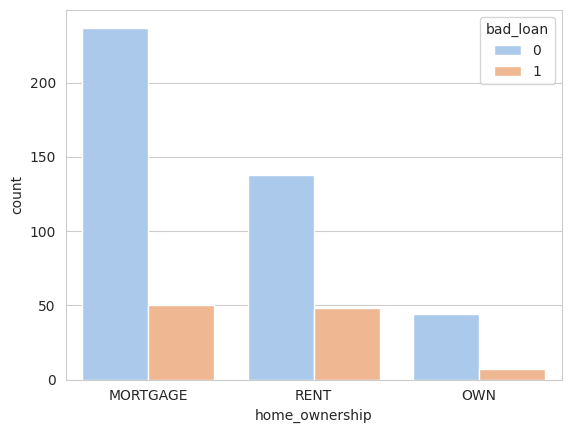

In [ ]:
# um dado que talvez seja interessante verificar é o tipo de propiedade da casa do tomador do empréstimo

with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=loan, x= 'home_ownership',hue="bad_loan", palette="pastel")

In [ ]:
# quem possui casa própria é menos propenso a ser devedor de um empréstimo, quem aluga e paga hipoteca possuem valores similares na inadimplência.

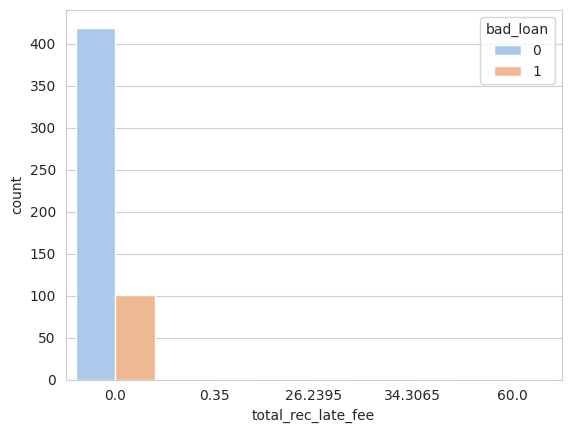

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=loan, x= 'total_rec_late_fee', hue="bad_loan", palette="pastel")

In [ ]:
# o número total de cerca de 100 inadimplentes é relevante se considerarmos outros itens individualmente

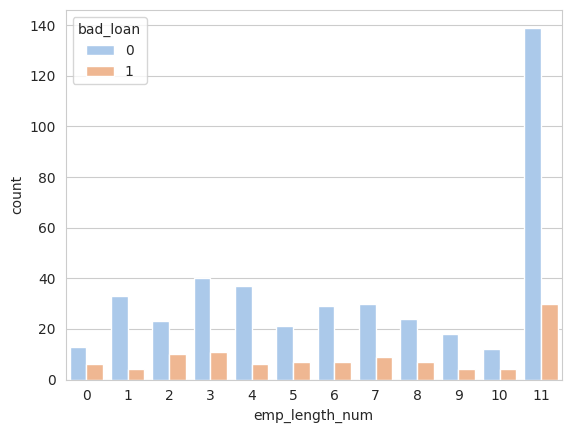

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=loan, x= 'emp_length_num', hue="bad_loan", palette="pastel")

In [ ]:
# o tempo de emprego não parece ter uma forte influência entre o pagamento ou não do empréstimo

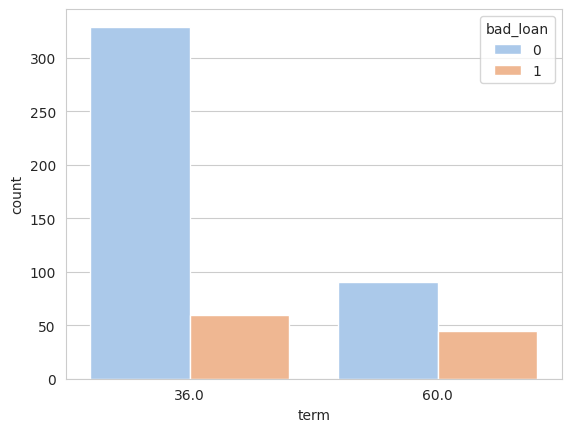

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=loan, x= 'term', hue="bad_loan", palette="pastel")

In [ ]:
# proporcionalmente os empréstimos de 60 meses são mais propensos de não serem pagos.

In [ ]:
loan_2 = loan

In [ ]:
loan_2.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
44,C,75000.0,0,11,MORTGAGE,7.46,debt_consolidation,36.0,0,0.0,12.4,0.0,0.472723,1
76,B,41600.0,0,3,MORTGAGE,17.22,credit_card,36.0,1,1.0,73.9,0.0,0.755054,0
143,C,98280.0,0,11,RENT,26.43,debt_consolidation,60.0,1,1.0,37.7,0.0,0.918451,0
226,A,223000.0,0,5,MORTGAGE,1.35,debt_consolidation,36.0,1,1.0,21.1,0.0,0.511911,0
237,C,55000.0,0,7,RENT,22.43,debt_consolidation,36.0,0,0.0,67.7,0.0,0.036955,1


In [ ]:
 # será necessário fazer transformações para transformar as colunas STR em float.
loan_2['grade_nom_A'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'A' else 0)
loan_2['grade_nom_B'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'B' else 0)
loan_2['grade_nom_C'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'C' else 0)
loan_2['grade_nom_D'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'D' else 0)
loan_2['grade_nom_E'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'E' else 0)
loan_2['grade_nom_F'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'F' else 0)
loan_2['grade_nom_G'] = loan_2['grade'].apply(lambda grade: 1 if grade == 'G' else 0)

In [ ]:
loan_2['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [ ]:
loan_2['home_ownership_OWN'] = loan_2['home_ownership'].apply(lambda home_ownership: 1 if home_ownership == 'OWN' else 0)
loan_2['home_ownership_RENT'] = loan_2['home_ownership'].apply(lambda home_ownership: 1 if home_ownership == 'RENT' else 0)
loan_2['home_ownership_MORTAGE'] = loan_2['home_ownership'].apply(lambda home_ownership: 1 if home_ownership == 'MORTGAGE' else 0)

In [ ]:
loan_2['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'home_improvement', 'moving',
       'small_business', 'other', 'major_purchase', 'house', 'car',
       'vacation', 'medical', 'wedding'], dtype=object)

In [ ]:
loan_2['purpose_debt_consolidation'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'debt_consolidation' else 0)
loan_2['purpose_credit_card'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'credit_card' else 0)
loan_2['purpose_home_improvement'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'home_improvement' else 0)
loan_2['purpose_moving'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'moving' else 0)
loan_2['purpose_small_business'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'small_business' else 0)
loan_2['purpose_other'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'other' else 0)
loan_2['purpose_major_purchase'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'major_purchase' else 0)
loan_2['purpose_house'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'house' else 0)
loan_2['purpose_car'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'car' else 0)
loan_2['purpose_vacation'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'vacation' else 0)
loan_2['purpose_medical'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'medical' else 0)
loan_2['purpose_wedding'] = loan_2['purpose'].apply(lambda purpose: 1 if purpose == 'wedding' else 0)

In [ ]:
loan_2 = loan_2.drop('grade', axis='columns')

In [ ]:
loan_2 = loan_2.drop('home_ownership', axis='columns')

In [ ]:
loan_2 = loan_2.drop('purpose', axis='columns')

In [ ]:
loan_2.head()

,annual_inc,short_emp,emp_length_num,dti,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,...,purpose_home_improvement,purpose_moving,purpose_small_business,purpose_other,purpose_major_purchase,purpose_house,purpose_car,purpose_vacation,purpose_medical,purpose_wedding
44,75000.0,0,11,7.46,36.0,0,0.0,12.4,0.0,0.472723,...,0,0,0,0,0,0,0,0,0,0
76,41600.0,0,3,17.22,36.0,1,1.0,73.9,0.0,0.755054,...,0,0,0,0,0,0,0,0,0,0
143,98280.0,0,11,26.43,60.0,1,1.0,37.7,0.0,0.918451,...,0,0,0,0,0,0,0,0,0,0
226,223000.0,0,5,1.35,36.0,1,1.0,21.1,0.0,0.511911,...,0,0,0,0,0,0,0,0,0,0
237,55000.0,0,7,22.43,36.0,0,0.0,67.7,0.0,0.036955,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

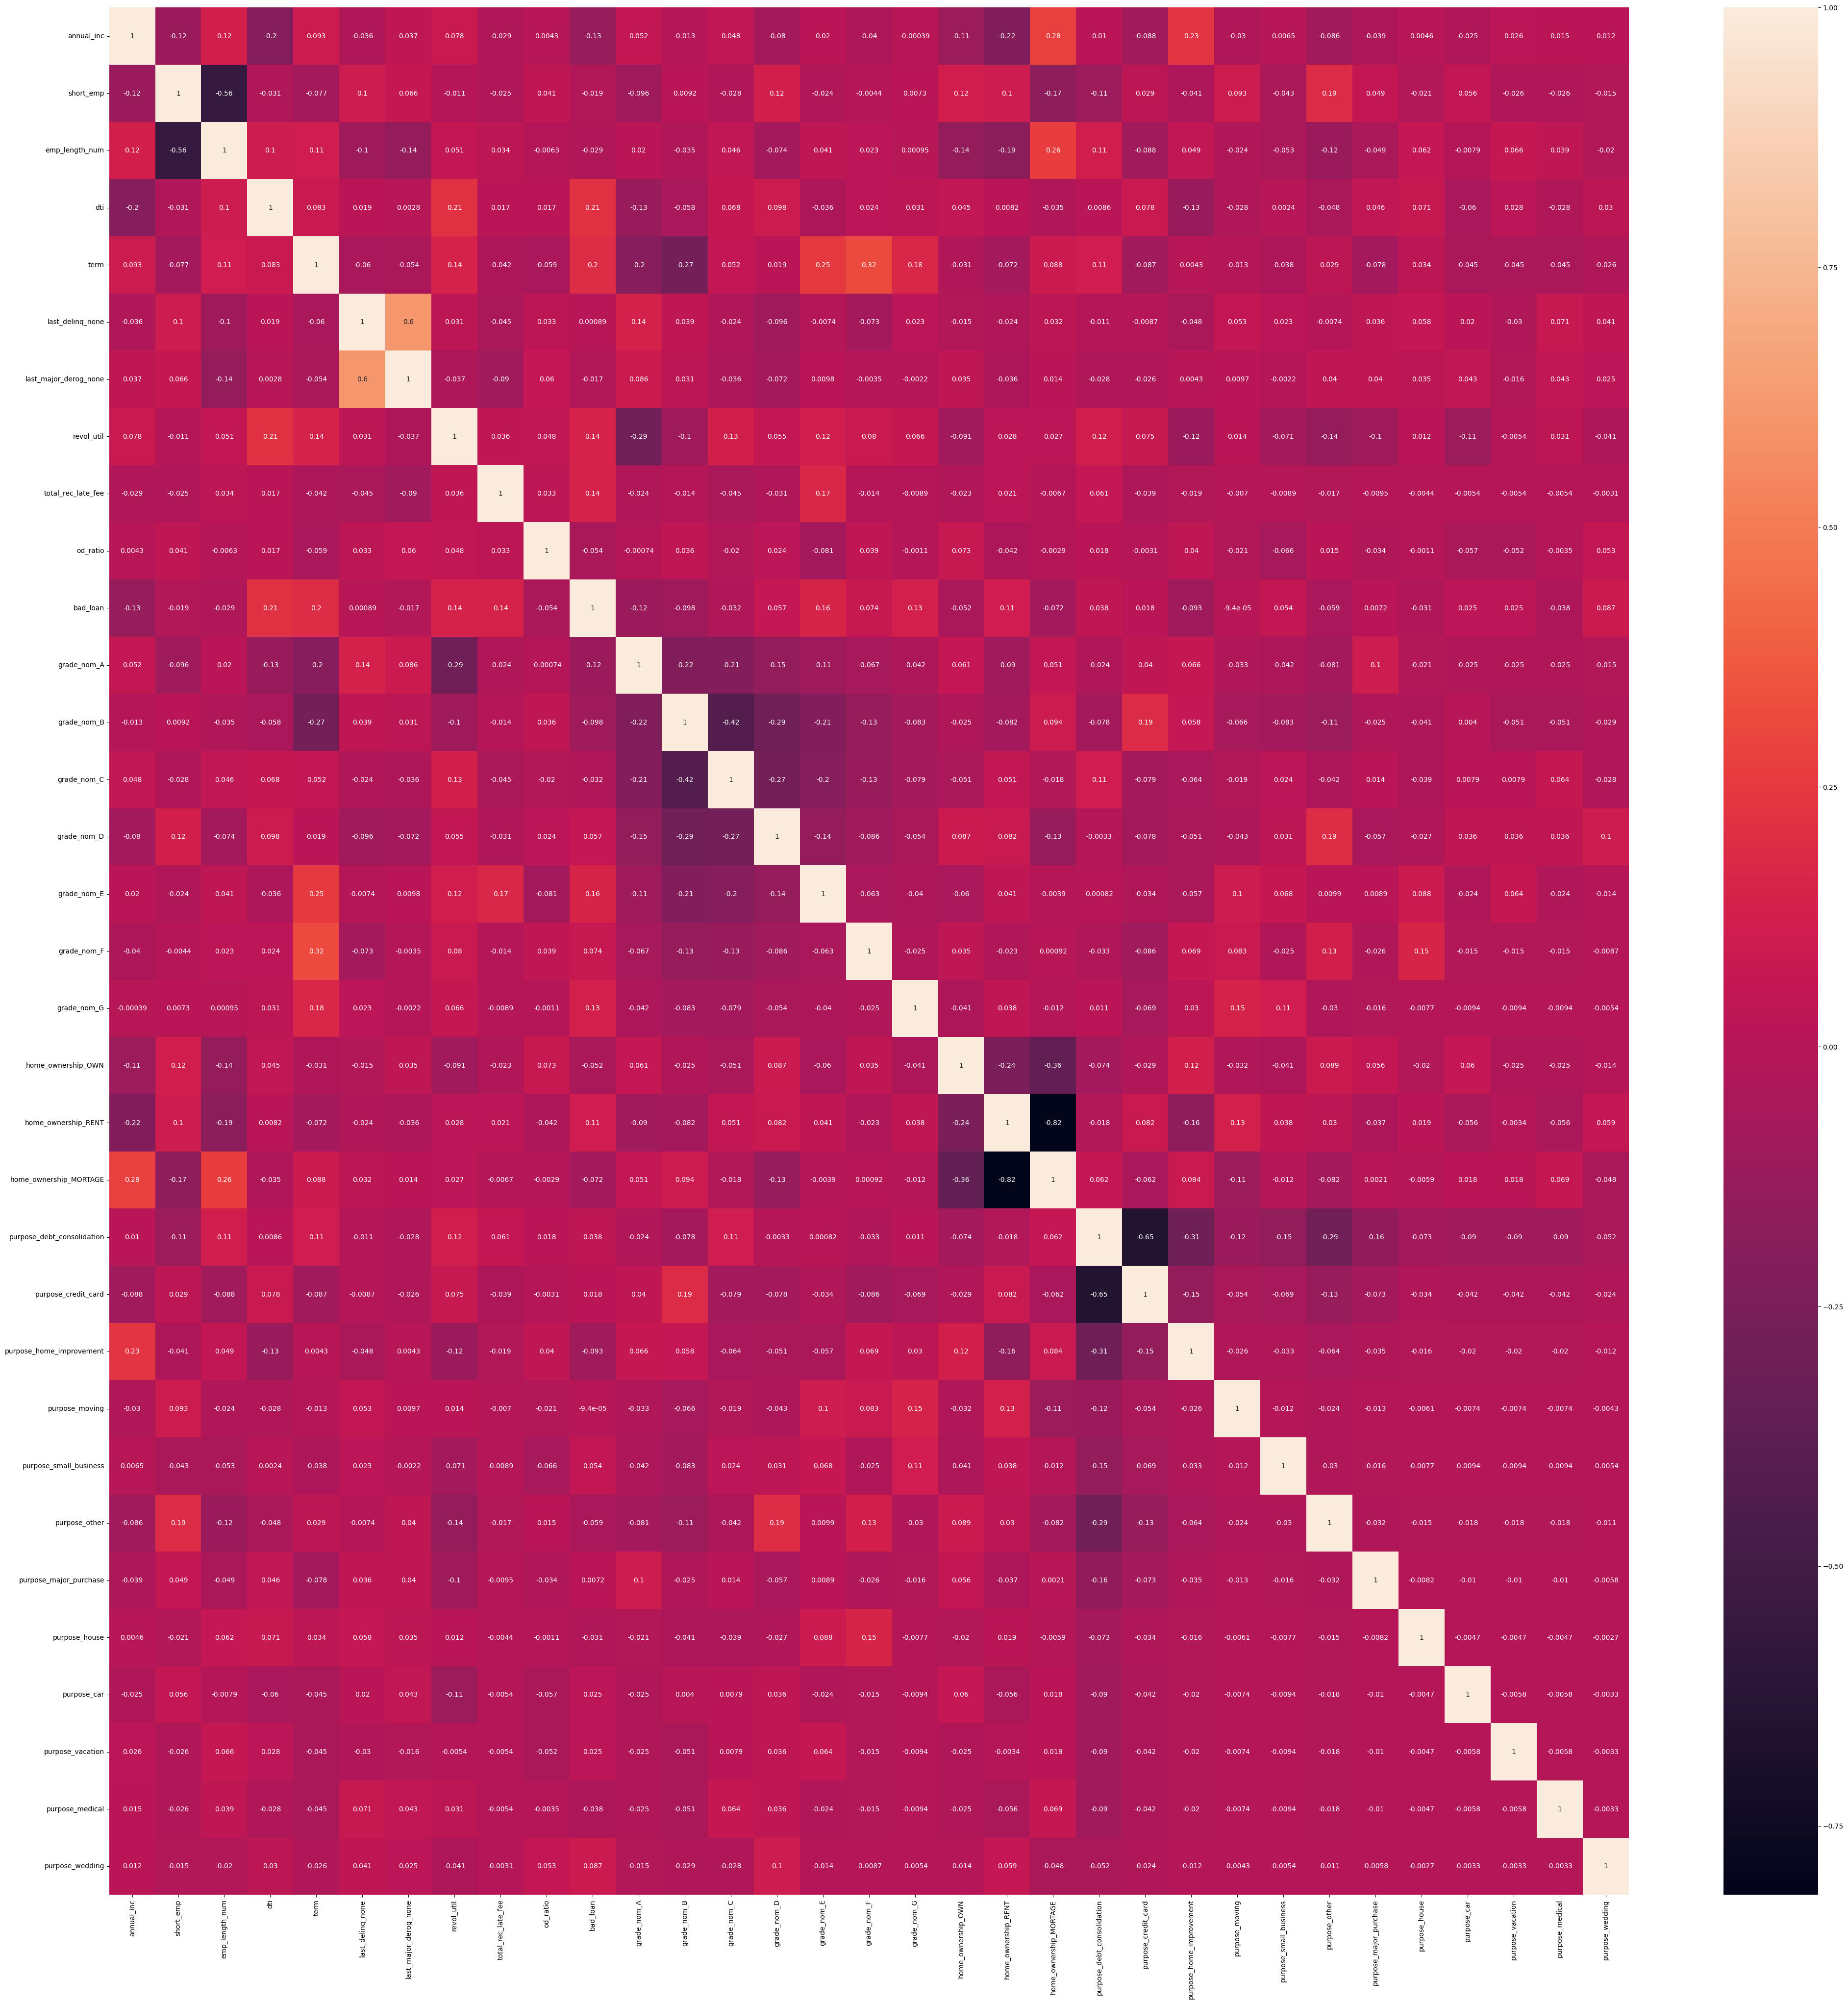

In [ ]:
#agora vamos plotar um mapa de calor para a visualização da correlação ficar mais fácil de analisar.
fig, ax = plt.subplots(figsize=(50, 50))
corr=loan_2.corr()
sns.heatmap(corr,annot=True)

In [ ]:
#como são muitas variáveis, o heatmap não ficou muito bom, vamos tirar algumas colunas para fazer uma visualização melhor

In [ ]:
loan_3 = loan

In [ ]:
loan_3 = loan_3[["annual_inc", "short_emp", 'emp_length_num', 'last_delinq_none', 'last_major_derog_none', 'total_rec_late_fee', 'od_ratio', 'dti', 'bad_loan']]

In [ ]:
loan_3.head()

,annual_inc,short_emp,emp_length_num,last_delinq_none,last_major_derog_none,total_rec_late_fee,od_ratio,dti,bad_loan
44,75000.0,0,11,0,0.0,0.0,0.472723,7.46,1
76,41600.0,0,3,1,1.0,0.0,0.755054,17.22,0
143,98280.0,0,11,1,1.0,0.0,0.918451,26.43,0
226,223000.0,0,5,1,1.0,0.0,0.511911,1.35,0
237,55000.0,0,7,0,0.0,0.0,0.036955,22.43,1


<Axes: >

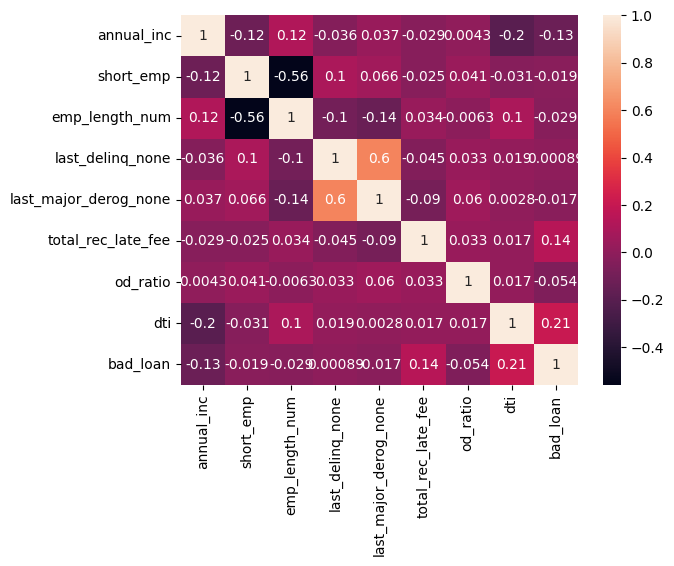

In [ ]:
corr=loan_3.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# de acordo com o heatmap, o DTI e total_rec_late_fee são as colunas com maior correlação com o não pagamento, isso se considerarmos apenas as colunas numéricas.

In [ ]:
X = loan_2['dti']
Y = loan['bad_loan']
np.corrcoef(X,Y)

array([[1.        , 0.21404242],
       [0.21404242, 1.        ]])

In [ ]:
X = loan_2['total_rec_late_fee']
Y = loan['bad_loan']
np.corrcoef(X,Y)

array([[1.        , 0.14307111],
       [0.14307111, 1.        ]])

In [ ]:
# O DataFrame loan_2 não funcionou como o esperado

In [ ]:
loan_4 = pd.get_dummies(loan, columns = ['grade', 'home_ownership', 'term', 'purpose', 'emp_length_num'])

In [ ]:
# após muitos erros foi necessário criar um novo DataFrame, dessa vez modificando a coluna de tempo de emprego

In [ ]:
first_column = loan_4.pop('bad_loan')

In [ ]:
loan_4.insert(0, 'bad_loan', first_column)

In [ ]:
loan_4.head()

,bad_loan,annual_inc,short_emp,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,term_36.0,term_60.0,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,emp_length_num_0,emp_length_num_1,emp_length_num_2,emp_length_num_3,emp_length_num_4,emp_length_num_5,emp_length_num_6,emp_length_num_7,emp_length_num_8,emp_length_num_9,emp_length_num_10,emp_length_num_11
44,1,75000.0,0,7.46,0,0.0,12.4,0.0,0.472723,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
76,0,41600.0,0,17.22,1,1.0,73.9,0.0,0.755054,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
143,0,98280.0,0,26.43,1,1.0,37.7,0.0,0.918451,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
226,0,223000.0,0,1.35,1,1.0,21.1,0.0,0.511911,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
237,1,55000.0,0,22.43,0,0.0,67.7,0.0,0.036955,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
loan_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 44 to 19892
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bad_loan                    524 non-null    int64  
 1   annual_inc                  524 non-null    float64
 2   short_emp                   524 non-null    int64  
 3   dti                         524 non-null    float64
 4   last_delinq_none            524 non-null    int64  
 5   last_major_derog_none       524 non-null    float64
 6   revol_util                  524 non-null    float64
 7   total_rec_late_fee          524 non-null    float64
 8   od_ratio                    524 non-null    float64
 9   grade_A                     524 non-null    bool   
 10  grade_B                     524 non-null    bool   
 11  grade_C                     524 non-null    bool   
 12  grade_D                     524 non-null    bool   
 13  grade_E                     524 non-n

In [ ]:
from sklearn.model_selection import train_test_split
predictors_train, predictors_test, target_train, target_test = train_test_split(
    loan_4.drop(['bad_loan'], axis=1),
    loan_4['bad_loan'],
    test_size=0.33,
    random_state=123
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['annual_inc', 'short_emp', 'dti', 'last_delinq_none',
        'last_major_derog_none', 'revol_util', 'total_rec_late_fee',
        'od_ratio', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
        'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
        'home_ownership_OWN', 'home_ownership_RENT', 'term_36.0',
        'term_60.0', 'purpose_car', 'purpose_credit_card',
        'purpose_debt_consolidation', 'purpose_home_improvement',
        'purpose_house', 'purpose_major_purchase', 'purpose_medical',
        'purpose_moving', 'purpose_other', 'purpose_small_business',
        'purpose_vacation', 'purpose_wedding', 'emp_length_num_0',
        'emp_length_num_1', '

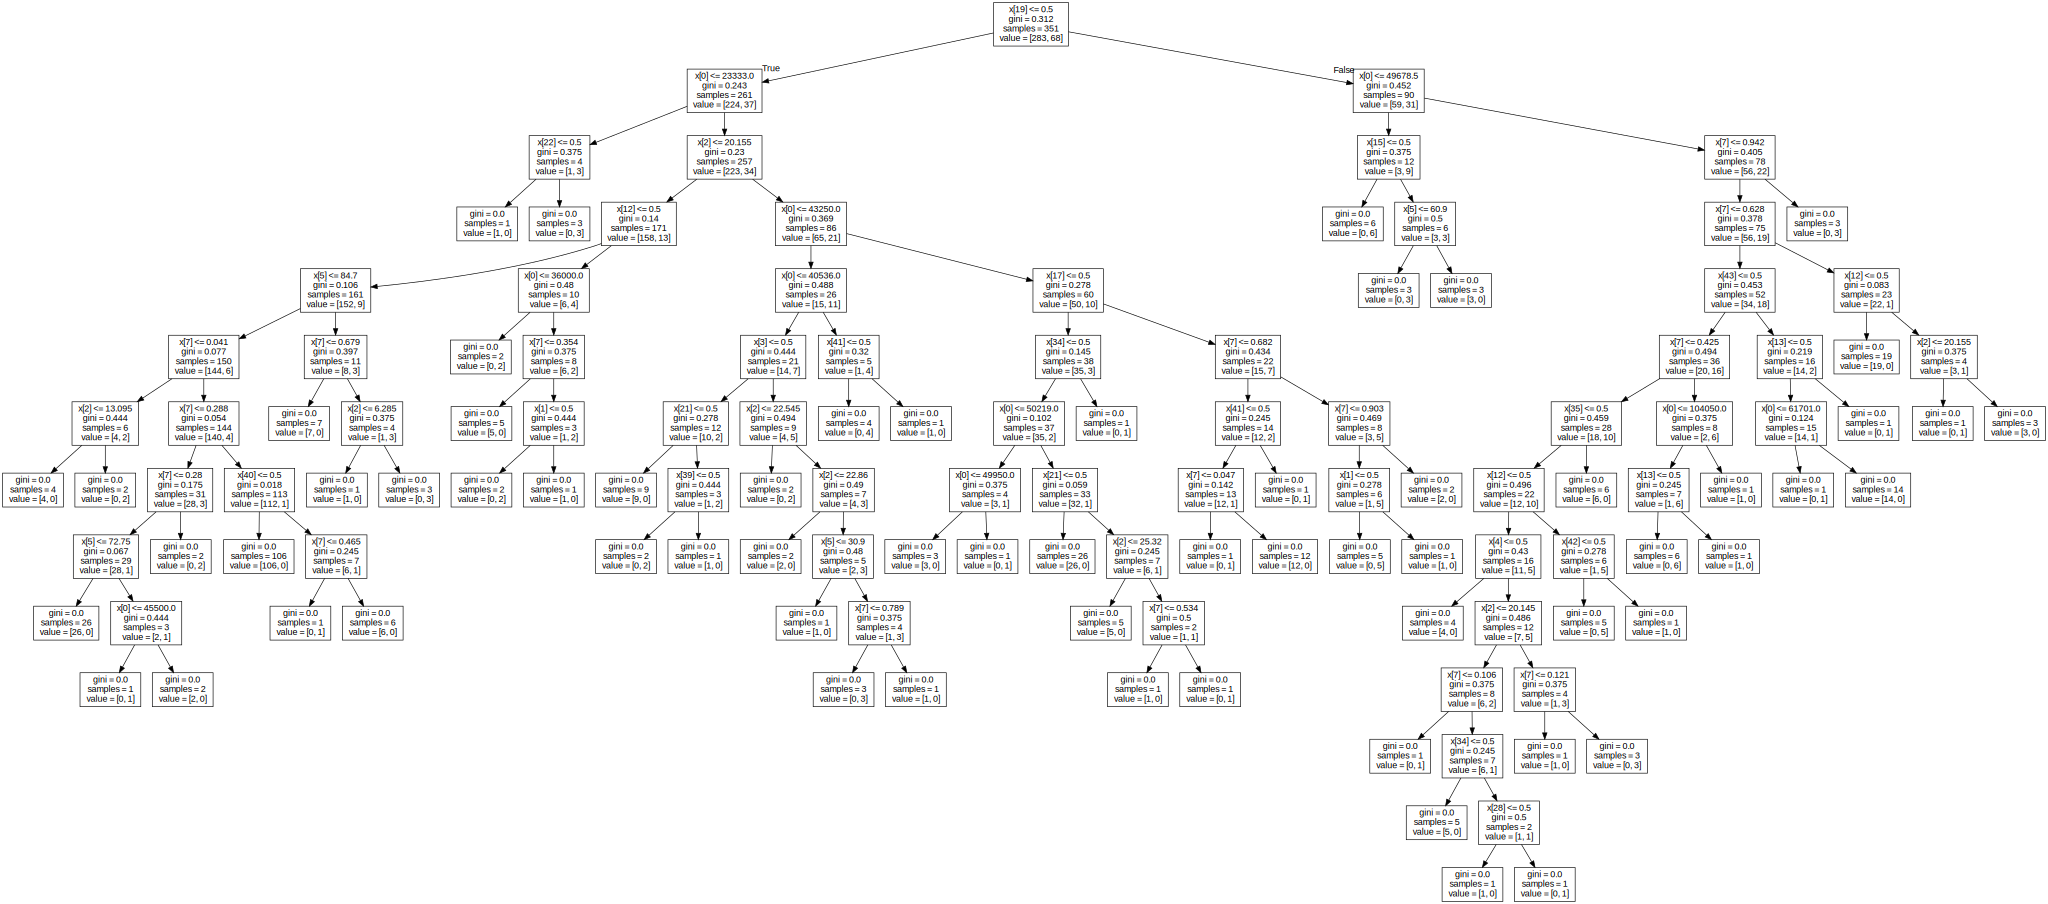

In [ ]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [ ]:
# a decision tree continua muito complexa

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[108  28]
 [ 26  11]]


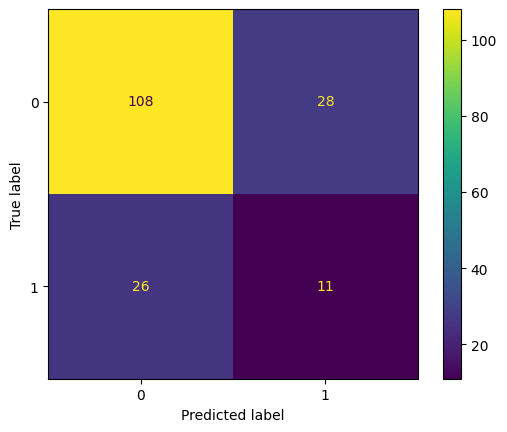

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, predictors_test, target_test)
plt.show()

In [ ]:
# Acurácia

In [ ]:
total = confusion_matrix.sum()
print(total)

173


In [ ]:
acertos = np.diag(confusion_matrix).sum()
print(acertos)

119


In [ ]:
acuracia = acertos / total
print(acuracia)

0.6878612716763006


In [ ]:
print(f"{round(100 * acuracia, 2)}%")

68.79%


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model = model.fit(predictors_train, target_train)

In [ ]:
from sklearn.metrics import mean_squared_error

target_predicted = model.predict(predictors_test)

rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.41385996335366115


In [ ]:
# Predição de novo cliente

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
loan_4.head(1)

,bad_loan,annual_inc,short_emp,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,term_36.0,term_60.0,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,emp_length_num_0,emp_length_num_1,emp_length_num_2,emp_length_num_3,emp_length_num_4,emp_length_num_5,emp_length_num_6,emp_length_num_7,emp_length_num_8,emp_length_num_9,emp_length_num_10,emp_length_num_11
44,1,75000.0,0,7.46,0,0.0,12.4,0.0,0.472723,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
cliente = np.array([55000.0, 0, 5.8, 0, 0.0, 10, 0.0, 0.25, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cliente = model.predict(cliente.reshape(1, -1))
print(cliente)

[0.22203145]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# o cliente, provavelmente, não seria um devedor.